In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
# ensure cleaning.py is in the same directory
from cleaning import clean_text
from nltk import word_tokenize
from nltk.util import ngrams  
import collections

In [14]:
tweets_data = pd.read_csv("more-tweets-extracted.csv")

# Hashtags were in string form of list. Convert them to python lists.
import ast
tweets_data.hashtags = [ast.literal_eval(x) for x in tweets_data.hashtags]

tweets_data

,user_id,screen_name,tweet_id,tweet_url,timestamp,text,hashtags,has_media,img_urls,video_url,user_location,processed_text,label
0,1139435031204548608,zkwnsaari,1262868325803024389,/zkwnsaari/status/1262868325803024389,2020-05-19 22:10:46,"Cornering men with the phrase ""sexual harassme...",[],0.0,[],NaN,"Perak, Malaysia",corner men phrase sexual harassment abuse power,NaN
1,1262662724628238338,anuglywoman1,1262856464651243525,/anuglywoman1/status/1262856464651243525,2020-05-19 21:23:38,Sexual harassment..is to make someone fucked u...,[],0.0,[],NaN,Pain,sexual harassment make someone fuck mentally,NaN
2,15199808,Vidyut,1262838343404044296,/Vidyut/status/1262838343404044296,2020-05-19 20:11:38,Fellow asking about abuse women face online/st...,[],0.0,[],NaN,India,fellow asking abuse woman face online street h...,NO_DV
3,257394747,PramodChturvedi,1262824245517672449,/PramodChturvedi/status/1262824245517672449,2020-05-19 19:15:36,Case registered against employee of private co...,"[AndhraPradesh, Krishna]",0.0,[],NaN,"Hyderabad, New Delhi, Ballia",case register employee private company sexual ...,NO_DV
4,2247560024,FeminismInIndia,1262816952164196355,/FeminismInIndia/status/1262816952164196355,2020-05-19 18:46:38,Institutional Failures & The Increasing Relian...,[],0.0,[],NaN,India,institutional failure increase reliance social...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,857761954018058241,satpal13414,1212326306739703808,/satpal13414/status/1212326306739703808,2020-01-01 10:54:50,#स्वर्ण_युग\nGolden Time Is Coming\nThe other ...,[स],1.0,['https://pbs.twimg.com/media/ENMMVmYU0AAim4b....,NaN,"Rewari, India",स्वर्ण युग golden time coming woman girl would...,DV
1692,1156956207640244224,Mohit__solanki,1212256040089075712,/Mohit__solanki/status/1212256040089075712,2020-01-01 06:15:37,Golden Time Is Coming\nThe other woman and gir...,[स],0.0,[],NaN,"Firozpur, India",golden time coming woman girl would see mother...,DV
1693,838337330322751488,BRAJBHANDAS1234,1212234940441493505,/BRAJBHANDAS1234/status/1212234940441493505,2020-01-01 04:51:46,#स्वर्ण_युग#स्वर्ण_युग\nGolden Time Is Coming\...,"[स, स]",1.0,['https://pbs.twimg.com/media/ENK5O_DUwAEnmUY....,NaN,"Gandhidham, India",स्वर्ण युग स्वर्ण युग golden time coming woman...,DV
1694,972168388490379264,NiteshP82110245,1212212166549331969,/NiteshP82110245/status/1212212166549331969,2020-01-01 03:21:16,#HeavenOnEarth_By_SaintRampalJi\n Time Is Comi...,[HeavenOnEarth_By_SaintRampalJi],1.0,['https://pbs.twimg.com/media/ENKkdxCVAAAxcxF....,NaN,"मध्य प्रदेश, भारत",heavenonearth saintrampalji time coming woman ...,DV


In [15]:
# Making list of all hashtags in corpus
hashtags = []
for ht in tweets_data.hashtags:
    if len(ht):
        hashtags += ht

# Most common hashtags
Counter(hashtags).most_common(100)

[('BanTikTokInIndia', 187),
 ('BanTiktok', 175),
 ('IslamicLawForRapists', 73),
 ('BanTikToklnlndia', 54),
 ('tiktokexposed', 28),
 ('FaizalSiddiqui', 21),
 ('tiktokban', 16),
 ('TikTok', 15),
 ('MeToo', 13),
 ('tiktokdown', 13),
 ('BanTikTokApp', 11),
 ('NirbhayaCase', 9),
 ('BanTikTokIndia', 8),
 ('sexual', 8),
 ('rape', 8),
 ('प', 7),
 ('lockdown', 7),
 ('carryminati', 6),
 ('harassment', 6),
 ('BanTikTokInIndiahttps', 6),
 ('India', 6),
 ('justiceforcarry', 6),
 ('boyslockeroom', 6),
 ('SriLanka', 6),
 ('GenerationEquality', 6),
 ('Constitution_Of_GodKabir', 6),
 ('tiktok', 6),
 ('tiktokindia', 5),
 ('BanTikTok', 5),
 ('boyslockerroom', 5),
 ('TwitterTrolls', 5),
 ('COVID19', 5),
 ('AuratMarch', 5),
 ('InternationalWomensDay', 5),
 ('domesticviolence', 5),
 ('GargiCollege', 5),
 ('BanTiktokhttps', 5),
 ('mondaythoughts', 5),
 ('20MFORCARRY', 5),
 ('PakistanisAgainstChildAbuse', 5),
 ('JusticeForChildren', 5),
 ('news', 5),
 ('childrights', 5),
 ('stopchildsexualabuse', 5),
 ('AsimR

In [16]:
# Cleaning text
clean_text(tweets_data,'text')

# Delete duplicates on the basis of same processed text
tweets_data.drop_duplicates(subset = "processed_text", inplace=True)
tweets_data.reset_index(drop=True, inplace=True)

print('Now shape of data = ',tweets_data.shape)

Cleaning text and storing it in new column 'processed_text'
CLEANED! 

Now shape of data =  (1694, 13)


In [17]:
all_text = ' '.join(str(word) for word in tweets_data.processed_text.values) 
tokens = word_tokenize(all_text)
    
unigrams = ngrams(tokens, 1)
unigrams = collections.Counter(unigrams).most_common(15)
unigrams

[(('sexual',), 1215),
 (('abuse',), 617),
 (('harassment',), 462),
 (('rape',), 449),
 (('child',), 389),
 (('woman',), 352),
 (('violence',), 319),
 (('content',), 258),
 (('promote',), 236),
 (('case',), 226),
 (('pic',), 214),
 (('india',), 202),
 (('assault',), 196),
 (('tiktok',), 195),
 (('bantiktok',), 194)]

In [18]:
bigrams = ngrams(tokens, 2)
bigrams = collections.Counter(bigrams).most_common(15)
bigrams

[(('sexual', 'harassment'), 282),
 (('sexual', 'abuse'), 259),
 (('sexual', 'content'), 205),
 (('acid', 'attack'), 167),
 (('sexual', 'assault'), 157),
 (('child', 'sexual'), 120),
 (('promote', 'acid'), 117),
 (('rape', 'threat'), 94),
 (('sexual', 'violence'), 78),
 (('domestic', 'violence'), 77),
 (('religion', 'community'), 67),
 (('community', 'abuse'), 67),
 (('youth', 'india'), 63),
 (('child', 'abuse'), 53),
 (('attack', 'pic'), 53)]

In [19]:
# Approach 1 - Using LDA for discovering topics

In [20]:
vectorizer = TfidfVectorizer(max_features = 5000, ngram_range=(1,2))

# apply transformation
tf = vectorizer.fit_transform(tweets_data['processed_text']).toarray()
print(f'Shape of transformed matrix : {tf.shape}')
      
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

Shape of transformed matrix : (1694, 5000)


In [21]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i]) 
                                                     for i in topic.argsort()[:-no_top_words - 1:-1]]

    return pd.DataFrame(topic_dict)

In [22]:
# Feel free to experiment different numbers of topics
number_of_topics = 2

# Using LDA for finding relatable topics
model = LatentDirichletAllocation(n_components = number_of_topics, random_state = 42)
model.fit(tf)

no_top_words = 20
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 1 words
0,pic,sexual
1,content,harassment
2,promote,abuse
3,bantiktokinindia,child
4,sexual content,woman
5,tiktok,sexual harassment
6,bantiktok,sexual abuse
7,rape,violence
8,attack,case
9,acid,assault


In [23]:
# Topic 0 words are generally included in awareness posts or ban tiktok posts.
# Topic 1 words are headlines or real victim stories.
# But this doesn't guarantee a clear-cut classification.

In [24]:
# Approach 2 - Using Keywords to label some broad topics

In [25]:
# Add a column for labels
tweets_data['label'] = ['']*len(tweets_data)

In [26]:
for i in range(len(tweets_data)):  

    # Find all posts related to domestic violence    
    if any(word in tweets_data.processed_text[i] for word in ['husband','wife','daughter','father','relative','mother', \
                                                              'sister','uncle','grandfather','neighbour','parent','child', \
                                                              'cousin','inlaw','in-law','boyfriend','marital','domestic','liquor']) \
    and tweets_data.label[i] == '':
        tweets_data.label[i] = 'DV'

    # Find all posts related to awareness, opinions, not DV
    elif any(word in tweets_data.processed_text[i] for word in ['prevent','law','helpline','aware','survey','webinar', \
                                                                'initiative','pandemic','commission','guide', 'article', \
                                                                'responsibility','delete','work','tiktok','bantiktok', \
                                                                'content','tik','tok','action','equality','equal','employee', \
                                                                'company','right','movie','feminism','film','online']) \
    and tweets_data.label[i] == '':
        tweets_data.label[i] = 'NO_DV'
    

DV       733
NO_DV    532
         429
Name: label, dtype: int64


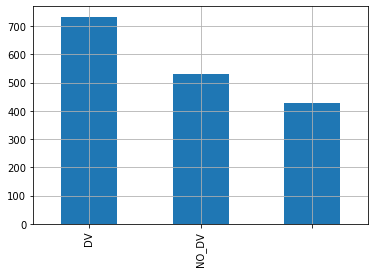

In [27]:
# tweets not labeled yet 
print(tweets_data.label.value_counts())

tweets_data.label.value_counts().plot(kind='bar',grid=True);